<a href="https://colab.research.google.com/github/Gurpreet654/Machine-Learning-Classification/blob/main/Classification_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading dataset directly from kaggle**

In [ ]:
! pip install -q kaggle                    #quick guide https://www.kaggle.com/general/74235
from google.colab import files
files.upload()
# Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Make directory named kaggle and copy kaggle.json file there.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (2).json


In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign         #token from kaggle https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?select=Train

100% 610M/612M [00:05<00:00, 162MB/s]
100% 612M/612M [00:05<00:00, 118MB/s]


In [ ]:
# unzip train data there,
! unzip gtsrb-german-traffic-sign.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train/5/00005_00053_00010.png  
  inflating: train/train/5/00005_00053_00011.png  
  inflating: train/train/5/00005_00053_00012.png  
  inflating: train/train/5/00005_00053_00013.png  
  inflating: train/train/5/00005_00053_00014.png  
  inflating: train/train/5/00005_00053_00015.png  
  inflating: train/train/5/00005_00053_00016.png  
  inflating: train/train/5/00005_00053_00017.png  
  inflating: train/train/5/00005_00053_00018.png  
  inflating: train/train/5/00005_00053_00019.png  
  inflating: train/train/5/00005_00053_00020.png  
  inflating: train/train/5/00005_00053_00021.png  
  inflating: train/train/5/00005_00053_00022.png  
  inflating: train/train/5/00005_00053_00023.png  
  inflating: train/train/5/00005_00053_00024.png  
  inflating: train/train/5/00005_00053_00025.png  
  inflating: train/train/5/00005_00053_00026.png  
  inflating: train/train/5/00005_00053_00027.png  
  inflating: train/train/5/0000

Changing the name of each folder class to string

In [ ]:
import os
# old_name = r"/content/train/Train/1"
# # new_name = r"/content/train/Train/speed_30"
d="/content/train/Train"
for i in range (0,43):
  os.rename(str(d+'/'+ str(i)), str(d+'/AA'+str(i)))

In [ ]:
num_classes=len(os.listdir(d))
labels_2=dict()
for i in range(0,43):
  labels_2[i]='AA'+str(i)
print(labels_2)

{0: 'AA0', 1: 'AA1', 2: 'AA2', 3: 'AA3', 4: 'AA4', 5: 'AA5', 6: 'AA6', 7: 'AA7', 8: 'AA8', 9: 'AA9', 10: 'AA10', 11: 'AA11', 12: 'AA12', 13: 'AA13', 14: 'AA14', 15: 'AA15', 16: 'AA16', 17: 'AA17', 18: 'AA18', 19: 'AA19', 20: 'AA20', 21: 'AA21', 22: 'AA22', 23: 'AA23', 24: 'AA24', 25: 'AA25', 26: 'AA26', 27: 'AA27', 28: 'AA28', 29: 'AA29', 30: 'AA30', 31: 'AA31', 32: 'AA32', 33: 'AA33', 34: 'AA34', 35: 'AA35', 36: 'AA36', 37: 'AA37', 38: 'AA38', 39: 'AA39', 40: 'AA40', 41: 'AA41', 42: 'AA42'}


In [ ]:
inv_map = {v: k for k, v in labels_2.items()}
# data_dir_list.remove('.ipynb_checkpoints')
# img

**Importing libraries**

In [ ]:

# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD



In [ ]:
# data_dir_list.remove('.ipynb_checkpoints')
# Define data path
data_path = '/content/train/Train'
data_dir_list = os.listdir(data_path)
img_rows=64
img_cols=64
num_channel=1
num_epoch=5

# Define the number of classes
num_classes = 43

# labels_name={'RGB1':0,'T1':1,'GT1':2}
labels_name=inv_map

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	# img_list.remove('.ipynb_checkpoints')
	for img in img_list:
		if img!='.ipynb_checkpoints':
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_resize=cv2.resize(input_img,(64,64))
			img_data_list.append(input_img_resize)
			labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding


Loading the images of dataset-AA23

Loading the images of dataset-AA28

Loading the images of dataset-AA18

Loading the images of dataset-AA8

Loading the images of dataset-AA30

Loading the images of dataset-AA16

Loading the images of dataset-AA1

Loading the images of dataset-AA0

Loading the images of dataset-AA19

Loading the images of dataset-AA7

Loading the images of dataset-AA12

Loading the images of dataset-AA11

Loading the images of dataset-AA34

Loading the images of dataset-AA17

Loading the images of dataset-AA13

Loading the images of dataset-AA27

Loading the images of dataset-AA5

Loading the images of dataset-AA6

Loading the images of dataset-AA36

Loading the images of dataset-AA39

Loading the images of dataset-AA2

Loading the images of dataset-AA24

Loading the images of dataset-AA4

Loading the images of dataset-AA25

Loading the images of dataset-AA42

Loading the images of dataset-AA22

Loading the images of dataset-AA32

Loading the images of dataset-AA29



**Preparing the dataset**

In [ ]:
import tensorflow as tf
Y = tf.keras.utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
#
img_data= np.expand_dims(img_data, axis=3) 

#%%
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(64, 64)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
			input_img_flatten=image_to_feature_vector(input_img,(64,64))
			img_data_list.append(input_img_flatten)
	
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if tf.keras.backend.image_data_format()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled


**Preparing the model**

In [ ]:

#%%
# Defining the model

# Viewing model_configuration
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=(64,64,1)))
#model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(num_classes,activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                 

True

**Training**

In [ ]:
#%%
#training_set = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_set = tf.data.Dataset.from_tensor_slices((X_test, y_test))
X_train1=np.expand_dims(X_train, -1)
X_test1=np.expand_dims(X_test, -1)
y_train1=np.expand_dims(y_train, -1)
y_test1=np.expand_dims(y_test, -1)
training_set=(X_train1, y_train1)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
import tensorflow as tf
num_epoch=25
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
X_TRAIN = np.array(X_train.reshape(-1, 64, 64,1))
X_TEST = np.array(X_test.reshape(-1, 64, 64,1))
hist = model.fit(X_TRAIN, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_TEST, y_test))
# model.fit(X_TRAIN,y_train, epochs=10, validation_split=0.1)

Epoch 1/25
1961/1961 [==============================] - 34s 17ms/step - loss: 1.3422 - accuracy: 0.5516 - val_loss: 0.6138 - val_accuracy: 0.8511
Epoch 2/25
1961/1961 [==============================] - 35s 18ms/step - loss: 1.2649 - accuracy: 0.5691 - val_loss: 0.5982 - val_accuracy: 0.8565
Epoch 3/25
1961/1961 [==============================] - 39s 20ms/step - loss: 1.2023 - accuracy: 0.5905 - val_loss: 0.5256 - val_accuracy: 0.8883
Epoch 4/25
1961/1961 [==============================] - 36s 18ms/step - loss: 1.1727 - accuracy: 0.6001 - val_loss: 0.5158 - val_accuracy: 0.8735
Epoch 5/25
1961/1961 [==============================] - 31s 16ms/step - loss: 1.1180 - accuracy: 0.6207 - val_loss: 0.4404 - val_accuracy: 0.9030
Epoch 6/25
1961/1961 [==============================] - 36s 18ms/step - loss: 1.0789 - accuracy: 0.6341 - val_loss: 0.4086 - val_accuracy: 0.9035
Epoch 7/25
1961/1961 [==============================] - 36s 18ms/step - loss: 1.0193 - accuracy: 0.6534 - val_loss: 0.3666 -

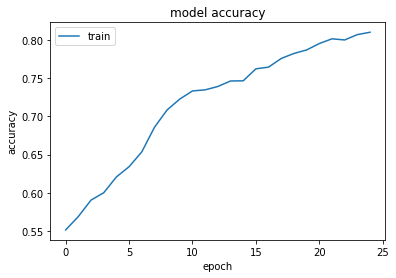

In [ ]:
history=hist
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

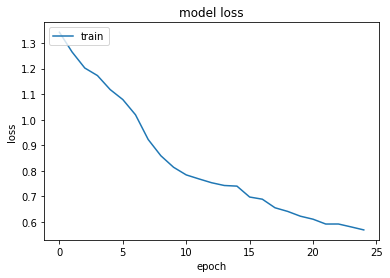

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test on Single image

1/1 [==============================] - 0s 40ms/step
[24]


Text(0.5, 1.0, 'Road narrows from right')

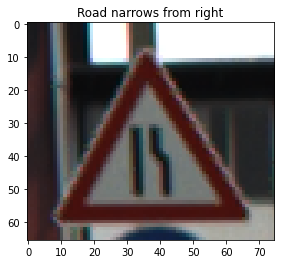

In [ ]:
#%%
#images/humans/rider-200.jpg
aa1=cv2.imread('/content/train/Test/00044.png')
aa4=cv2.cvtColor(aa1, cv2.COLOR_BGR2RGB)
aa2=cv2.cvtColor(aa1, cv2.COLOR_BGR2GRAY)
aa2=cv2.resize(aa2,(64,64))
test_img = np.array(aa2.reshape(-1, 64, 64,1))
pp=model.predict(test_img)
pp1 = np.argmax(pp, axis=1)
#predict_number=16
#import matplotlib.pyplot as plt
plt.imshow(aa4)
labels_name=['speed limit 20','speed limit 30','speed limit 60','speed limit 70',
             'speed limit 80','speed limit 80 end','speed limit 100','speed limit 120',
             'No passing','No passing for vehicles over 3,5 tonnes','Priority','Priority road','Yield',
             'Stop','Road closed','Sliding_car','Trucks not allowed','Do not enter','General danger','left Curve',
             'right Curve','Double curve','Uneven road surface','Slippery when wet or dirty','Road narrows from right','Roadworks',
             'Traffic signals ahead', 'Pedestrians', 'Watch for children(school,)','Bicycle crossing','Ice / snow','Wild animal crossing','speed limit end',
             'right turn','left turn','go Straight','Turn right or go straight','Turn left or go straight','Pass by on right',
             'Pass by on left','Roundabout','End of no passing zone','End of no passing zone for trucks']
print(pp1)
plt.title(labels_name[pp1[0]])
# print({'AA23': 0, 'AA28': 1, 'AA18': 2, 'AA8': 3})

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_TEST)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = labels_name
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

246/246 [==============================] - 1s 3ms/step
[[5.57e-03 1.37e-01 2.76e-01 ... 1.23e-03 5.06e-08 8.62e-08]
 [4.19e-07 4.44e-03 1.24e-02 ... 3.97e-02 5.28e-06 2.28e-10]
 [2.49e-05 4.34e-01 5.19e-01 ... 7.41e-11 3.99e-22 1.75e-17]
 ...
 [6.83e-11 2.31e-02 9.47e-01 ... 1.34e-15 3.20e-25 2.38e-16]
 [5.29e-09 1.37e-06 9.41e-06 ... 4.63e-06 3.77e-13 4.03e-12]
 [1.58e-07 8.99e-05 3.57e-03 ... 9.41e-04 3.16e-04 3.87e-06]]
[ 2 17  2 ...  2 35 13]
                                         precision    recall  f1-score   support

                         speed limit 20       0.00      0.00      0.00        43
                         speed limit 30       0.89      0.78      0.83       434
                         speed limit 60       0.63      0.88      0.74       413
                         speed limit 70       0.94      0.57      0.71       293
                         speed limit 80       0.85      0.94      0.89       412
                     speed limit 80 end       0.55      0.78  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[  0  21   0 ...   0   0   0]
 [  0 339  66 ...   0   0   0]
 [  0   8 363 ...   0   0   0]
 ...
 [  0   3   0 ...  18   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   0]]


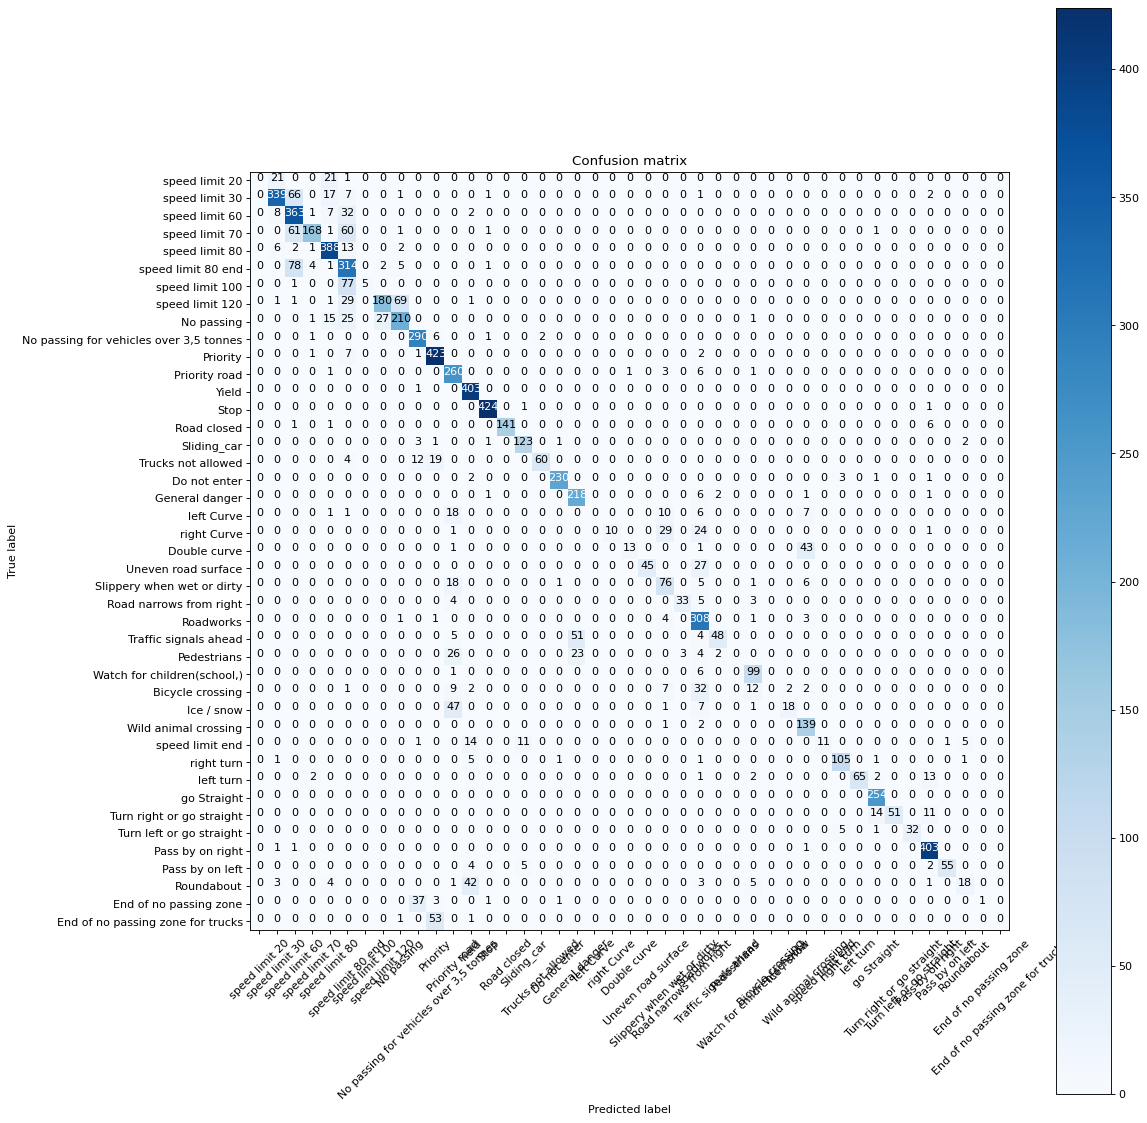

In [ ]:

#%%

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure(figsize=(15, 15), dpi=80)
# figure()
# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [ ]:
#%%
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk


1/1 [==============================] - 0s 92ms/step
(1, 62, 62, 32)


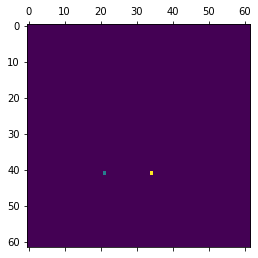

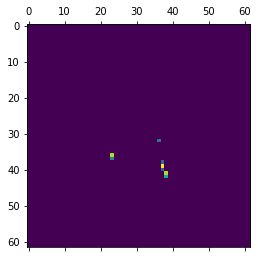

In [ ]:


#%%
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = tf.keras.Model(model.input,layer_outputs)
activations = activation_model.predict(test_img)
  
# Getting Activations of first layer
first_layer_activation = activations[1]
  
# shape of first layer activation
print(first_layer_activation.shape)
  
# 6th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 8], cmap ='viridis')
  
# 15th channel of the image after first layer of convolution is applied
plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')


